# Gemma Chess: Discover a New Dimension!

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemma-cookbook/blob/main/Gemma/[Gemma_3]Chess.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
!pip install gemma
!pip install python-chess cairosvg

## Load Gemma 3

In [ ]:
import os
from google.colab import userdata

# Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
# vars as appropriate for your system.
os.environ["KAGGLE_USERNAME"] = userdata.get("KAGGLE_USERNAME")
os.environ["KAGGLE_KEY"] = userdata.get("KAGGLE_KEY")

# Avoid memory fragmentation on JAX
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

import kagglehub

GEMMA_VARIANT = "gemma3-12b-it"
GEMMA_PATH = kagglehub.model_download(f'google/gemma-3/flax/{GEMMA_VARIANT}')
print(GEMMA_PATH)
CKPT_PATH = os.path.join(GEMMA_PATH, GEMMA_VARIANT)
TOKENIZER_PATH = os.path.join(GEMMA_PATH, 'tokenizer.model')
print('CKPT_PATH:', CKPT_PATH)
print('TOKENIZER_PATH:', TOKENIZER_PATH)

# Load model parameters and tokenizer
from gemma import gm

model = gm.nn.Gemma3_12B()
params = gm.ckpts.load_params(CKPT_PATH)
tokenizer = gm.text.Gemma3Tokenizer(TOKENIZER_PATH)

chatbot = gm.text.ChatSampler(
    model=model,
    params=params,
    multi_turn=False,
    tokenizer=tokenizer,
)

/root/.cache/kagglehub/models/google/gemma-3/flax/gemma3-12b-it/1
CKPT_PATH: /root/.cache/kagglehub/models/google/gemma-3/flax/gemma3-12b-it/1/gemma3-12b-it
TOKENIZER_PATH: /root/.cache/kagglehub/models/google/gemma-3/flax/gemma3-12b-it/1/tokenizer.model


## Helper functions

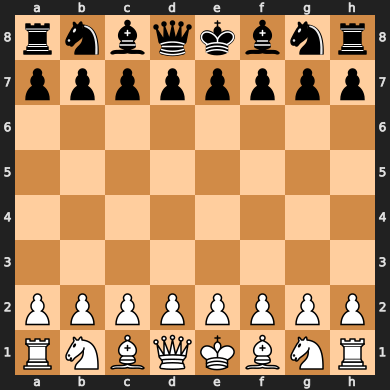

In [ ]:
import chess
import chess.svg

board = chess.Board()

from cairosvg import svg2png
from io import BytesIO
from PIL import Image

def get_board_img(board):
    out = BytesIO()
    svg2png(chess.svg.board(board=board), write_to=out)
    return Image.open(out)

import re

def extract_code_blocks(text):
  """
  Extracts code blocks enclosed in triple backticks
  """
  code_block_regex = r"`(.*?)`"
  blocks = re.findall(code_block_regex, text, re.DOTALL)

  cleaned_blocks = []
  for block in blocks:
    if len(block) <= 0:
      continue

    # Remove optional language specifier
    clean_block = block.strip()
    if '\n' in clean_block:
      clean_block = clean_block.split('\n', 1)[1]
    else:
      clean_block = clean_block
    cleaned_blocks.append(clean_block.strip())

  return cleaned_blocks

def build_prompt():
  prompt = f"""<start_of_image>
If you decide to invoke any of the function(s), it should be wrapped with ```tool_code```.

You have access to the following tools.

* `board.push_san(move:str)`: Make a move in standard algebraic notation)

{'BLACK' if board.turn == chess.BLACK else 'WHITE'} to move.
Possible moves are {list(board.legal_moves)}.
Make your move.
"""
  print(prompt)
  return prompt

def build_prompt_rev():
  prompt = f"""If you decide to invoke any of the function(s), it should be wrapped with ```tool_code```.

You have access to the following tools.

* `get_best_move()`: Get the best move from the engine.

{'BLACK' if board.turn == chess.BLACK else 'WHITE'} to move.
Get the next best move and explain it easy enough for five year old.
"""
  return prompt

get_board_img(board)

# Explainer

In [ ]:
prompt = f"""What is the most interesting move from below?

[Event "IBM Man-Machine, New York USA"]
[Site "01"]
[Date "1997.??.??"]
[EventDate "?"]
[Round "?"]
[Result "1-0"]
[White "Garry Kasparov"]
[Black "Deep Blue (Computer)"]
[ECO "A06"]
[WhiteElo "?"]
[BlackElo "?"]
[PlyCount "89"]
1.Nf3 d5 2.g3 Bg4 3.b3 Nd7 4.Bb2 e6 5.Bg2 Ngf6 6.O-O c6 7.d3 Bd6 8.Nbd2 O-O 9.h3 Bh5 10.e3 h6 11.Qe1 Qa5 12.a3 Bc7 13.Nh4 g5 14.Nhf3 e5 15.e4 Rfe8 16.Nh2 Qb6 17.Qc1 a5 18.Re1 Bd6 19.Ndf1 dxe4 20.dxe4 Bc5 21.Ne3 Rad8 22.Nhf1 g4 23.hxg4 Nxg4 24.f3 Nxe3 25.Nxe3 Be7 26.Kh1 Bg5 27.Re2 a4 28.b4 f5 29.exf5 e4 30.f4 Bxe2 31.fxg5 Ne5 32.g6 Bf3 33.Bc3 Qb5 34.Qf1 Qxf1+ 35.Rxf1 h5 36.Kg1 Kf8 37.Bh3 b5 38.Kf2 Kg7 39.g4 Kh6 40.Rg1 hxg4 41.Bxg4 Bxg4 42.Nxg4+ Nxg4+ 43.Rxg4 Rd5 44.f6 Rd1 45.g7 1-0
"""

response = chatbot.chat(prompt=prompt)
print(response)

Okay, let's analyze this game between Kasparov and Deep Blue and pinpoint the most interesting move.  Given the context of this match (Kasparov vs. a supercomputer), the moves that stand out are those that demonstrate either Kasparov's strategic brilliance or Deep Blue's surprising (or flawed) calculations.

After careful consideration, I believe **32. g6** is the most interesting move. Here's why:

*   **Sacrifice and Initiative:** This move is a pawn sacrifice (g6). Pawn sacrifices are often interesting because they disrupt the opponent's plans and can create attacking opportunities. In this case, Kasparov sacrifices the pawn to open the g-file and create a direct attack on Deep Blue's king.
*   **Deep Blue's Calculation Error (Likely):** It's highly probable that Deep Blue miscalculated the consequences of this sacrifice. While the move isn't *immediately* winning, it creates a complex tactical situation that likely exceeded Deep Blue's ability to evaluate accurately at the time.  D

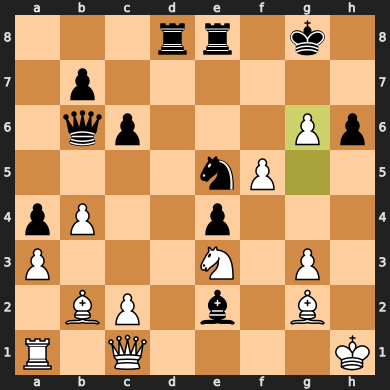

In [ ]:
board = chess.Board("3rr1k1/1p6/1qp4p/4nPP1/pP2p3/P3N1P1/1BP1b1B1/R1Q4K w - - 1 32")
board.push_san("g6")
board

# Storytellers

In [ ]:
prompt = f"""Write a short story about the gameplay below.

[Event "IBM Man-Machine, New York USA"]
[Site "01"]
[Date "1997.??.??"]
[EventDate "?"]
[Round "?"]
[Result "1-0"]
[White "Garry Kasparov"]
[Black "Deep Blue (Computer)"]
[ECO "A06"]
[WhiteElo "?"]
[BlackElo "?"]
[PlyCount "89"]
1.Nf3 d5 2.g3 Bg4 3.b3 Nd7 4.Bb2 e6 5.Bg2 Ngf6 6.O-O c6 7.d3 Bd6 8.Nbd2 O-O 9.h3 Bh5 10.e3 h6 11.Qe1 Qa5 12.a3 Bc7 13.Nh4 g5 14.Nhf3 e5 15.e4 Rfe8 16.Nh2 Qb6 17.Qc1 a5 18.Re1 Bd6 19.Ndf1 dxe4 20.dxe4 Bc5 21.Ne3 Rad8 22.Nhf1 g4 23.hxg4 Nxg4 24.f3 Nxe3 25.Nxe3 Be7 26.Kh1 Bg5 27.Re2 a4 28.b4 f5 29.exf5 e4 30.f4 Bxe2 31.fxg5 Ne5 32.g6 Bf3 33.Bc3 Qb5 34.Qf1 Qxf1+ 35.Rxf1 h5 36.Kg1 Kf8 37.Bh3 b5 38.Kf2 Kg7 39.g4 Kh6 40.Rg1 hxg4 41.Bxg4 Bxg4 42.Nxg4+ Nxg4+ 43.Rxg4 Rd5 44.f6 Rd1 45.g7 1-0
"""

response = chatbot.chat(prompt=prompt)
print(response)

The air in the IBM auditorium crackled with a nervous energy. It was 1997, New York City, and the world was holding its breath. Garry Kasparov, the reigning World Chess Champion, sat across from a hulking machine – Deep Blue, IBM’s chess-playing supercomputer. This was the rematch, the chance for Deep Blue to avenge its previous defeat.

Kasparov, a whirlwind of intensity, tapped his fingers on the table, his eyes fixed on the board. He’d studied Deep Blue’s previous games, analyzed its strengths and weaknesses. He knew this wasn't just a game; it was a symbolic battle – man versus machine, intuition versus calculation.

The opening unfolded with a familiar, almost polite, dance. Kasparov, playing white, opted for a solid, positional approach with 1. Nf3. Deep Blue responded predictably, but Kasparov, sensing an opportunity, began to subtly steer the game towards a more complex, tactical landscape. He sacrificed a pawn, a calculated risk to disrupt Deep Blue’s rigid, algorithmic thinki

# Supporting Chess Learning

In [ ]:
response = chatbot.chat(prompt="What is the \"Sicilian Defense\" in chess?")
print(response)

Okay, let's break down the Sicilian Defense in chess. It's a hugely popular and complex opening, considered the most popular response to White's opening move of 1. e4. Here's a comprehensive explanation, covering its basics, key ideas, variations, and why it's so important.

**1. The Basic Idea: Challenging White's Center**

* **White's Opening:** White typically starts with 1. e4 (moving the King's pawn two squares forward). This aims to control the center of the board and open lines for development.
* **Black's Response: 1... c5** This is the defining move of the Sicilian Defense. Instead of mirroring White's pawn move (like 1... e5, which leads to more symmetrical openings), Black plays 1... c5.
* **What it Does:**
    * **Challenges White's Central Control:**  The c5 pawn immediately attacks White's d4 square.  It prevents White from easily establishing a strong pawn center with d4.
    * **Asymmetrical Position:** The Sicilian creates an asymmetrical position from the very beginni

In [ ]:
response = chatbot.chat(prompt="시실리안 디펜스가 뭐야? 초등학생도 쉽게 이해할 수 있게 설명해줘.")
print(response)

자, 시실리안 디펜스는 체스에서 아주 유명하고 재미있는 수들로 이루어진 전략이야. 마치 숨바꼭질처럼, 상대방을 속이고 기회를 잡는 방법이라고 생각하면 돼!

**체스 게임 시작:**

체스 게임은 보통 이렇게 시작해.

```
   a b c d e f g h
8 ♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖ 8
7 ♙ ♙ ♙ ♙ ♙ ♙ ♙ ♙ 7
6 . . . . . . . . 6
5 . . . . . . . . 5
4 . . . . . . . . 4
3 . . . . . . . . 3
2 ♙ ♙ ♙ ♙ ♙ ♙ ♙ ♙ 2
1 ♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖ 1
   a b c d e f g h
```

**시실리안 디펜스는 뭘까?**

보통 백(흰색)이 먼저 움직이는데, 백이 폰을 앞으로 두 칸 움직이는 'e4' 수로 시작하는 경우가 많아. 그러면 검(검은색)은 그냥 폰을 앞으로 두 칸 움직이는 'e5' 대신, 다른 폰을 움직여서 백의 e4 폰을 공격하는 거야. 주로 'c5' 수로 움직여.

**왜 시실리안 디펜스라고 부를까?**

이 수법이 처음 시실리 섬에서 유행하기 시작했기 때문에 '시실리안'이라는 이름이 붙었대.

**왜 이렇게 움직이는 걸까?**

*   **상대방을 당황하게 만들기:** 백은 보통 e4에 폰을 움직였을 때, 검은색이 e5로 똑같이 움직일 거라고 예상하거든. 그런데 검은색이 다른 폰을 움직이면 백은 당황해서 어떤 수를 둘지 고민하게 돼.
*   **더 재미있는 게임 만들기:** 시실리안 디펜스는 복잡하고 다양한 수들이 나오기 때문에, 체스 게임이 더 재미있어질 수 있어. 마치 미로처럼, 상대방을 헷갈리게 만들면서 이길 수 있는 기회를 노리는 거지!

**쉽게 말하면:**

시실리안 디펜스는 체스에서 상대방을 놀라게 하고, 더 복잡하고 재미있는 게임을 만들 수 있는 전략이야. 마치 숨바꼭질에서 상대방이 어디 있는지 몰라하도록 숨는 것과 비슷하다고 생각하면 돼!

**더 궁금한 점이 있다면 언제든지 물어봐!**


In [ ]:
response = chatbot.chat(prompt="Give me a clear explanation of the concept of a \"passed pawn\" in chess.")
print(response)

Okay, let's break down the concept of a "passed pawn" in chess. It's a crucial idea for understanding pawn structure and endgame strategy.

**What is a Passed Pawn?**

A passed pawn is a pawn that has **no opposing pawns** on its file (the column it sits on) or on any adjacent files (the files immediately to its left and right).  Essentially, there's nothing blocking its path to promotion.

**Let's illustrate with an example:**

Imagine a chessboard.  Let's say White has a pawn on e5.

*   **If** there are no Black pawns on the e-file (e6, e7, e8) and no Black pawns on the d-file (d6, d7, d8) and no Black pawns on the f-file (f6, f7, f8), then the pawn on e5 is a **passed pawn**.

*   **If** Black has a pawn on e6, then the pawn on e5 is *not* a passed pawn.  It's blocked.

**Why are Passed Pawns Important?**

Passed pawns are powerful because they represent a potential threat of promotion.  Here's why they're valuable:

*   **Promotion Threat:** The ultimate goal of a pawn is to reach

# Gemma explain chess

In [ ]:
!wget https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-avx2.tar
!tar -xf stockfish-ubuntu-x86-64-avx2.tar

--2025-04-17 10:26:35--  https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-avx2.tar
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/official-stockfish/Stockfish/releases/download/sf_17.1/stockfish-ubuntu-x86-64-avx2.tar [following]
--2025-04-17 10:26:35--  https://github.com/official-stockfish/Stockfish/releases/download/sf_17.1/stockfish-ubuntu-x86-64-avx2.tar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/20976138/85758419-9488-4267-84ea-dc1379a61eb1?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250417%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250417T102636Z&X-Amz-Expires=300&X-Amz-Signature=a4ece38c7d3844f03978d51f858ffd

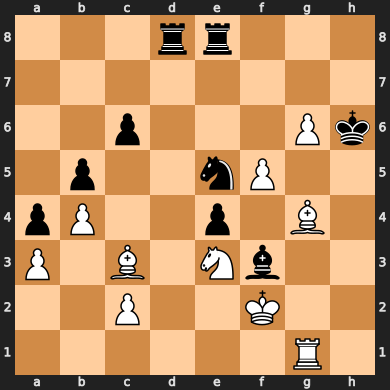

In [ ]:
import chess.engine
chessEngine = chess.engine.SimpleEngine.popen_uci("stockfish/stockfish-ubuntu-x86-64-avx2")

def get_best_move():
  return chessEngine.play(board, chess.engine.Limit(time=0.1)).move

sampler = gm.text.Sampler(
    model=model,
    params=params,
    tokenizer=tokenizer,
)
chat_prompt = "<start_of_turn>user\n{prompt}<end_of_turn>\n<start_of_turn>model\n"

position = "3rr3/8/2p3Pk/1p2nP2/pP2p1B1/P1B1Nb2/2P2K2/6R1 b - - 0 41"
board = chess.Board(position)
board

In [ ]:
prompt1 = chat_prompt.format(prompt=build_prompt_rev())
response1 = sampler.sample(prompt1)
chat_history = prompt1 + response1
print(chat_history)

<start_of_turn>user
If you decide to invoke any of the function(s), it should be wrapped with ```tool_code```.

You have access to the following tools.

* `get_best_move()`: Get the best move from the engine.

BLACK to move.
Get the next best move and explain it easy enough for five year old.
<end_of_turn>
<start_of_turn>model
Okay, let's figure out the best move for Black!

```tool_code
print(get_best_move())
```<end_of_turn>


<start_of_turn>user
If you decide to invoke any of the function(s), it should be wrapped with ```tool_code```.

You have access to the following tools.

* `get_best_move()`: Get the best move from the engine.

BLACK to move.
Get the next best move and explain it easy enough for five year old.
<end_of_turn>
<start_of_turn>model
Okay, let's figure out the best move for Black!

```tool_code
print(get_best_move())
```<end_of_turn><start_of_turn>user
<start_of_image>
```tool_output
e5g4
```
<end_of_turn>
<start_of_turn>model
Okay! The best move for Black is to move their knight from E5 to G4.

Imagine the knight is a little horse jumping over the board. It can jump over other pieces! This move puts the horse in a good spot to attack White's king and maybe even take some of their pieces. It's like a surprise attack!<end_of_turn>


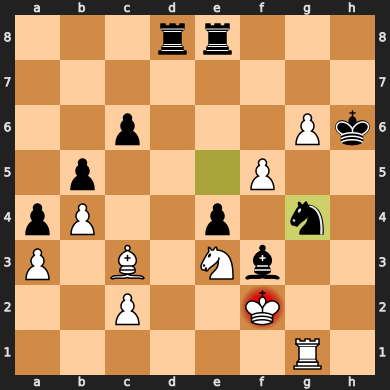

In [ ]:
# take the best move
import io
from contextlib import redirect_stdout

f = io.StringIO()
with redirect_stdout(f):
  result = eval(extract_code_blocks(response1)[0])
output = f.getvalue().rstrip('\n')
move = result if output == '' else output
board.push_san(move)

# return tool result, Gemma  to explain
prompt2 = chat_prompt.format(prompt=f"""<start_of_image>
```tool_output
{move}
```
""")
response2 = sampler.sample(chat_history + prompt2, images=get_board_img(board))
chat_history += prompt2 + response2
print(chat_history)

board